<a href="https://colab.research.google.com/github/jee365/ESAA/blob/main/0321_ch4_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4. 모델 훈련

선형 회귀 모델을 훈련시키는 두가지 방법
- **직접 계산**할 수 있는 공식을 사용해 가장 잘맞는 파라미터를 해석적으로 구함
- **경사하강법**을 이용해 모델 파라미터를 조금씩 바꾸면서 비용함수를 훈련 세트에 대해 최소화


##4.1 선형 회귀

일반적인 선형회귀 모델

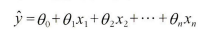

- yhat : 예측값
- n: 특성의 수
- xi: i번째 특성값
- ϴj: j번째 모델 파라미터 (**ϴ0: 편향** / 나머지는 가중치)

간단한 형태 

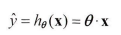

- ϴ는 편향 ϴ0와 특성 가중치를 담은 모델의 파라미터 벡터

- x는 x0에서 xn까지 담은 샘플의 특성 벡터

-  ϴx는 벡터 ϴ와 x의 점곱 ( ϴ0x0+ ϴ1x1+...+ ϴnxn)

- h ϴ는 모델 파라미터  ϴ를 사용한 가설 함수

선형 회귀 모델을 훈련시키려면 **RMSE를 최소화하는 ϴ:**를 찾아야 함

MSE 계산법

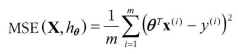

###4.1.1 정규방정식

비용 함수를 최소화하는 ϴ값을 찾기 위한 해석적인 방법

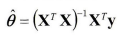

- ϴhat은 비용함수를 최소화하는 ϴ값

- y는 y1부터 ym까지 포함하는 타깃 벡터

In [ ]:
import numpy as np

#무작위로 선형 데이터셋 생성
X = 2*np.random.rand(100,1)
y= 4+3*X+np.random.randn(100,1)

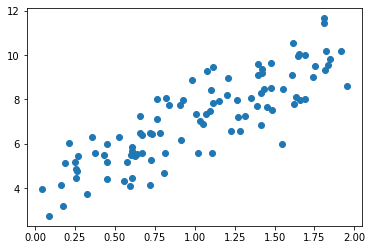

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [ ]:
#정규방정식으로 theta hat 계산
X_b = np.c_[np.ones((100,1)),X] #모든 샘플에 x0=1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best #비슷하지만 잡음이 있음

array([[3.86438772],
       [3.19787457]])

In [ ]:
#theta hat 사용
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #모든 샘플에 x0=1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86438772],
       [10.26013686]])

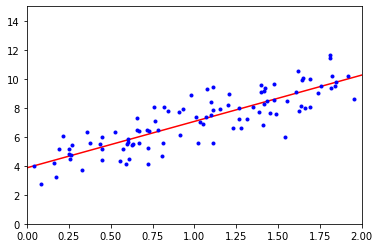

In [ ]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [ ]:
#사이킷런 이용
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([3.86438772]), array([[3.19787457]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 3.86438772],
       [10.26013686]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.86438772],
       [3.19787457]])

In [ ]:
#유사역행렬 구하기
np.linalg.pinv(X_b).dot(y)

array([[3.86438772],
       [3.19787457]])

유사역행렬은 **특잇값 분해(SVD)**를 통해 사용됨

SVD: 훈련 세트 행렬 **X를 U𝜮Vᵀ로 분해**

###4.1.2 계산 복잡도

사이킷런 LinearRegression 클래스가 사용하는 SVD 방법은 약 N^2로 특성의 개수가 두 배 늘어나면 계산 시간이 4배 정도 됨

##4.2 경사 하강법

경사하강법: 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘

- 파라미터 벡터 ϴ에 대해 비용 함수의 현재 그레이디언트를 계산. 그레이디언트 값이 0이 되면 최솟값에 도달

임의의 값 ϴ에서 시작해서 한번에 조금씩 비용함수(MSE)가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상

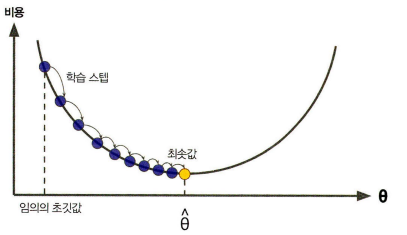

**학습률** 파라미터로 스텝(단계)의 크기 결정, 학습률이 작을수록 알고리즘 수행시간이 길어짐

<학습률이 너무 작을 때>

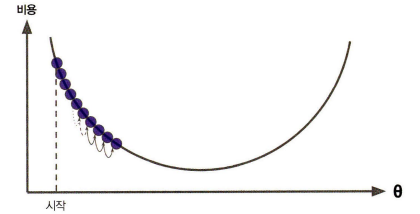

<학습률이 너무 클 때>

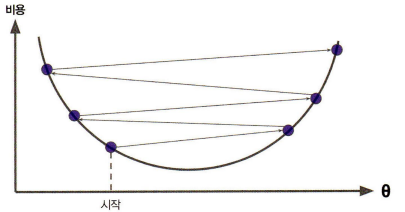

<경사 하강법의 한계>

무작위 초기화 때문에 전역 최솟값이 도달하지 못하고 지역 최솟값으로 수렴할 수도 있음

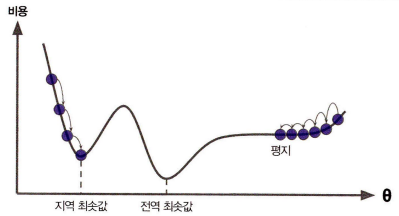

but MSE는 볼록 함수, 연속함수!(경사하강법으로 전역 최솟값에 접근할 수 있음)

**경사 하강법을 사용할 때 모든 특성이 같은 스케일을 가져야 빨리 수렴할 수 있음**(StandardScaler 이용)

###4.2.1 배치 경사 하강법

편도함수: 각 모델 파라미터 ϴj에 대해 비용 함수의 그레이디언트를 계산

<비용함수의 편도함수>

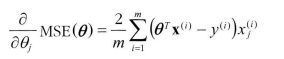

<비용함수의 그레이디언트 벡터>

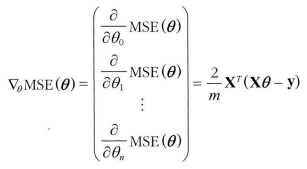

<경사하강법의 스텝>

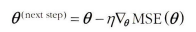

In [ ]:
eta=0.1 #학습률
n_iterations = 1000
m= 100

theta = np.random.randn(2,1) #무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[3.86438772],
       [3.19787457]])

적절한 학습률을 찾으려면 그리드 탐색 이용 -> 너무 오래 걸리는 모델을 막기 위해 반복 횟수 제한

적당한 반복 회수를 지정하기 위해 반복 횟루를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면(**허용오차보다 작아지면**) 알고리즘을 중지

허용오차가 1/10로 줄어들면 알고리즘은 10배 반복됨

###4.2.2 확률적 경사 하강법

배치 경사 하강법: 매 스텝에서 전체 훈련 세트를 사용

확률적 경사 하강법: 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트 계산

- 확률적이기 때문에 배치 경사 하강법보다 불안정

-> 이를 해결하기 위해 담금질 기법 사용

**담금질 기법**: 시작할 때는 학습률을 크게 하고 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 함

학습 스케줄: 매 반복에서 학습률을 결정하는 함수

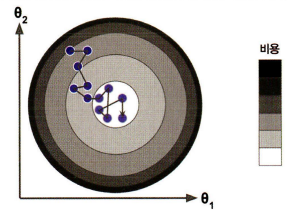

In [ ]:
#학습 스케줄을 사용한 확률적 경사 하강법의 구현
n_epochs =50
t0, t1 = 5, 50 #학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1) #무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta * gradients
    

한 반복에서 m번(훈련 세트의 샘플 수) 되풀이 되고, 각 반복을 **에포크**라고 함

In [ ]:
theta

array([[3.78030314],
       [3.20989649]])

In [ ]:
#사이킷런에서 SGDRegressor 클래스 사용
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.80399475]), array([3.20103112]))

###4.2.3 미니배치 경사 하강법

각 스텝에서 **미니배치**라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산(GPU를 이용해 성능 향상)

<확률적/미니배치/배치 경사하강법 알고리즘의 움직인 경로>

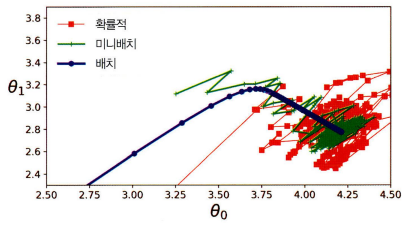

<선형 회귀를 사용한 알고리즘 비교>

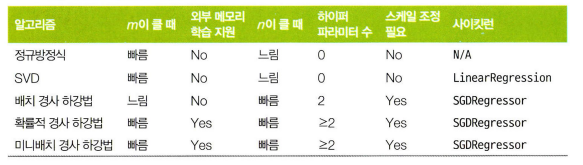

##4.3 다항 회귀

비선형 데이터를 학습하는데 선형 모델을 사용할 수 있음

**다항 회귀**: 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련

In [ ]:
#2차방정식으로 비선형 데이터 생성
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+X+2+np.random.randn(m,1)

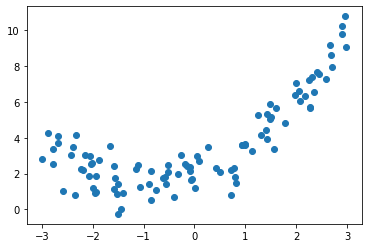

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y) #잡음이 포함된 비선형 데이터셋

In [ ]:
#사이킷런의 PolynomialFeatures를 사용해 훈련 데이터를 변환(전처리)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.49679107])

In [ ]:
X_poly[0]

array([0.49679107, 0.24680137])

In [ ]:
#X_polysms 특성 X와 특성의 제곱을 포함
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.93504651]), array([[1.00611309, 0.53504628]]))

예측된 모델: ŷ = 0.5x1^2 + 1.0x1 + 1.9

원래 함수: y = 0.5x1^2 + 1.0x1 + 2.0

특성이 여러 개일 때 다항 회귀(Polynomial Features)는 특성 사이의 관계를 찾을 수 있음

##4.4 학습 곡선

훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘면 모델이 **과대적합**된 것임

훈련 데이터에서 성능이 좋지 않고 교차 검증 점수도 나쁘면 모델이 **과소적합**된 것임

학습 곡선: 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련

In [ ]:
#모델의 학습 곡선을 그리는 함수
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
  train_errors, val_errors = [],[]
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='훈련 세트')
  plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='검증 세트')


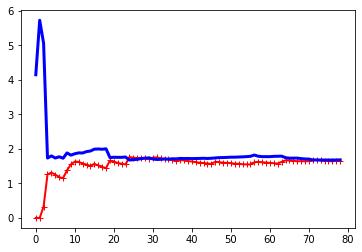

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y) #과소적합된 모델 생성

- 훈련 세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능해짐

- 모델이 적은 수의 훈련 샘플로 훈련할 때는 제대로 일반화될 수 없어서 검증 오차가 초기에 매우 큼

-> 과소적합, 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 함

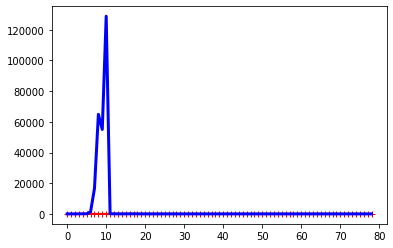

In [ ]:
#10차 다항회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
                                  ('lin_reg',LinearRegression()),
])

plot_learning_curves(polynomial_regression,X,y)

이전 학습 곡선과 비교했을 때

- 훈련 데이터의 오차가 선형 회귀의 모델보다 훨씬 낮음

- 두 곡선 사이에 공간이 있음. (훈련 데이터에서의 모델 성능 << 검증 데이터에서의 모델 성능) -> 과대적합 but 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐

**<편향/분산 트레이드 오프>**

- 편향: 일반화 오차 중에서 잘못된 가정으로 인한 것, 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉬움

- 분산: 훈련 데이터에 있는 작은변동에 모델이 과도하게 민감한 것, 높은 분산을 가지면 훈련 데이터에 과대적합되는 경향이 있음

- 줄일 수 없는 오차: 데이터 자체에 있는 잡음 때문에 발생

**모델의 복잡도 ⬆: 분산 ⬆, 편향 ⬇**

**모델의 복잡도 ⬇: 분산 ⬇, 편향 ⬆**

##4.5 규제가 있는 선형 모델

모델의 가중치를 규제하면 과대적합을 감소시킬 수 있음(자유도 ⬇)

###4.5.1 릿지 회귀

릿지 회귀: 규제가 추가된 선형 회귀 버전

- 비용함수에 규제항 추가

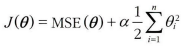

α로 모델을 얼마나 많이 규제할 지 조절(α= 0이면 선형회귀, α가 아주 크면 수평선에 가까워짐)

- 모델 훈련이 끝나면 규제가 없는 성능 지표로 모델의 성능을 평가

<릿지 회귀의 정규방정식>

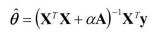

In [ ]:
#사이킷런에서 정규방정식을 사용한 릿지 회귀
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.14604338]])

In [ ]:
#확률적 경사 하강법을 사용한 릿지 회귀
sgd_reg = SGDRegressor(penalty='l2') #penalty로 사용할 규제 지정
#l2: 가중치 벡터(ㅣ2)의 노름의 제곱을 2로 나눈 규제항을 추가
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.1284095])

###4.5.2 라쏘 회귀

라쏘 회귀: 선형 회귀의 또 다른 규제된 버전, 가중치 벡터의 l1노 노름을 사용

- 라쏘 회귀의 비용 함수

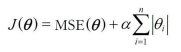


- 덜 중요한 특성의 가중치를 제거(0으로 만듦)

- 자동으로 특성을 선택하고 **희소 모델**(sparse model)을 생성

- 라쏘의 비용함수는 ϴi=0일때 미분 가능하지 않음

  -> 서브그레이디언트 벡트 g를 사용

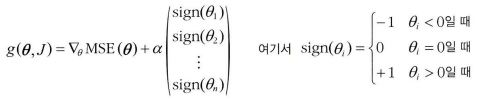

In [ ]:
#사이킷런 Lasso 클래스 이용
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

#Lasso 대신 SGDRegressor(penalty='l1')을 사용할 수도 있음

array([5.10195173])

###4.5.3 엘라스틱넷

엘라스틱넷: 릿지 회귀와 라쏘 회귀를 절충한 모델

<엘라스틱넷 비용 함수>

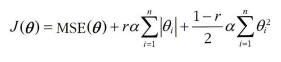

r=0 이면 릿지 회귀와 같고, r=1 이면 라쏘 회귀와 같음

- 특성이 몇개 안되는 경우: 라쏘나 엘라스틱넷 이용

- 특성 수가 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있는 경우: 엘라스틱넷 이용

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.10188359])

###4.5.4 조기 종료

**조기 종료**: 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 방법으로 **검증 에러가 최솟값에 도달하면 바로 훈련을 중지**시킴

<조기 종료 규제>

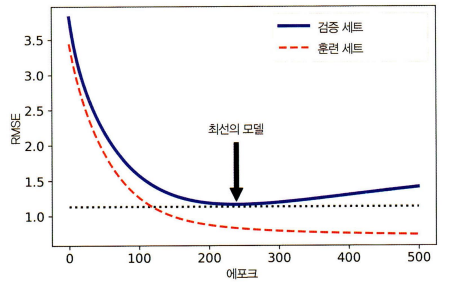

In [ ]:
#조기 종료 구현
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

#데이터 준비
poly_scaler = Pipeline([
                        ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
                        ('std_scaler', StandardScaler())
  ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, 
                       #warm_start를 True로 지정하면 fit() 메서드 호출될 때 이전 모델 파라미터에서 훈련을 이어감
                       penalty=None, learning_rate='constant', eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train) # 훈련을 이어서 진행합니다.
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

##4.6 로지스틱 회귀

로지스틱 회귀: 샘플이 특정 클래스에 속할 확률을 추정하는데 사용

- 양성 클래스: 추정 확률이 50% 이상(레이블이 '1')
- 음성 클래스: 추정 확률이 50% 미만(레이블이 '0')

###4.6.1 확률 추정

<로지스틱 회귀 모델의 확률 추정>

image.png

- 입력 특성의 가중치 합을 계산하고 이를 결괏값의 **로지스틱**으로 출력

- 로지스틱: 0과 1 사이의 값을 출력하는 **시그모이드 함수**

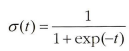

로지스틱 회귀 모델이 샘플 x가 양성 클래스에 속할 확률 phat을 추정하면 이에 대한 예측 yhat을 쉽게 구할 수 있음

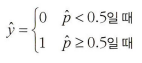

###4.6.2 훈련과 비용 함수

훈련의 목적: 양성 샘플(y=1)에 대해 높은 확률을 추정하고 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 ϴ를 찾는 것

<하나의 훈련 샘플에 대한 비용 함수>

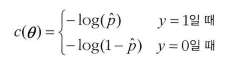

- t가 0에 가까워지면 -log(t)가 매우 커지므로 타당하다

  -> 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가

- t가 1에 가까우면 -log(t)는 0에 가까워짐

  -> 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워짐

<로지스틱 회귀의 비용 함수>

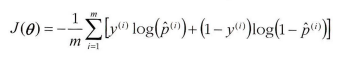

-> 최솟값 계산할 수 x, 편도 함수 사용

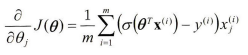

###4.6.3 결정 경계

In [ ]:
#iris 데이터 이용
#꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기 생성
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X= iris['data'][:,3:] #꽃잎의 너비
y= (iris['target']==2).astype(np.int) #Iris-Virginica면 1, 그렇지 않으면 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

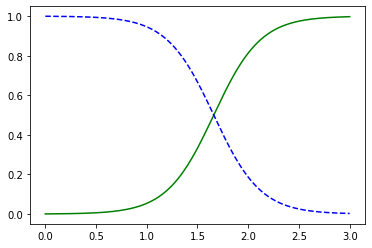

In [ ]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],'g-',label='Iris virginica')
plt.plot(X_new, y_proba[:,0],'b--',label='Not Iris virginica')

In [ ]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

###4.6.4 소프트맥스 회귀

**소프트맥스 회귀(다항 로지스틱 회귀)**: 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화한 모델

소프트맥스 함수: 소프트 맥스 회귀 모델의 각 클래스 k에 대한 점수 s(x)

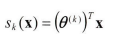

- ϴ(k): 파라미터 벡터

<소프트맥스 함수>

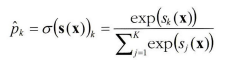

- K: 클래스 수
- s(x): 샘플 x에 대한 각 클래스의 점수를 담은 벡터
- σ(s(x)): 샘플 x에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정 확률

<소프트맥스 회귀 분류기의 예측>

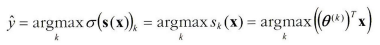

- 소프트맥스 회귀 분류기는 한번에 하나의 클래스만 예측(다중 출력 아님), 상호 배타적인 클래스에서만 사용해야 함

소프트맥스 회귀 분류의 목적: 타깃 클래스에 대해서 높은 확률을 추정하도록 만드는 것

-> **크로스 엔트로피** 비용 함수를 최소화

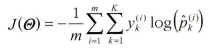

- y(i)는 i번째 샘플이 클래스 k에 속할 타깃 확률(1 or 0)

<클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터>

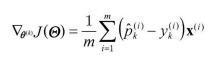

In [ ]:
#multi_class 매개변수를 'multinomial'로 바꿔서 소프트맥스 회귀 함수 사용
#solver 매개변수에 'lbfgs' 와 같은 소프트맥스 회귀를 지원하는 알고리즘 지정

X= iris['data'][:,(2,3)] #꽃잎 길이, 꽃잎 너비
y= iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5,2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

<소프트맥스 회귀 결정 경계>

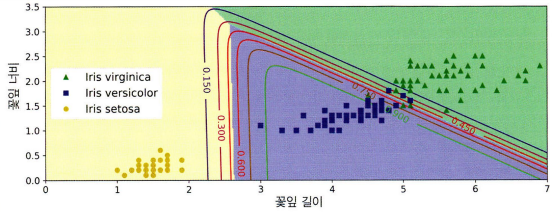